In [13]:
# set up:
%matplotlib inline
import random
import matplotlib.pylab as plt

from PIL import Image
import numpy as np
from scipy.misc import imresize
import glob

import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# preprocess images

# squash all images to size (512,512)
# adapted from https://github.com/ostegm/resizing/blob/master/Resizing.ipynb
size = 512
dpath = './chest_xray/'
X = {'train': [], 'val': [], 'test': []}
y = {'train': [], 'val': [], 'test': []}
for data_group in ['test', 'val', 'train']:
    for classified in ['NORMAL', 'PNEUMONIA']: 
        fnames = list(glob.iglob(dpath + f'{data_group}/{classified}/*.jpeg'))
        for fname in fnames:
            img = Image.open(fname).convert("L")
            img_arr = np.array(img)
            resized = imresize(img_arr, (size, size))
            _y = 0 if classified == 'NORMAL' else 1
            y[data_group].append(_y)
            X[data_group].append(resized)
            
# shuffle data
for data_group in X.keys():
    combined = list(zip(X[data_group], y[data_group]))
    random.shuffle(combined)
    X[data_group][:], y[data_group][:] = zip(*combined)
X_train, y_train = np.stack(X['train'], axis=0), np.stack(y['train'], axis=0)
X_val, y_val = np.stack(X['val'], axis=0), np.stack(y['val'], axis=0)
X_test, y_test = np.stack(X['test'], axis=0), np.stack(y['test'], axis=0)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app


Train data shape:  (5216, 512, 512)
Train labels shape:  (5216,)
Validation data shape:  (16, 512, 512)
Validation labels shape:  (16,)
Test data shape:  (624, 512, 512)
Test labels shape:  (624,)


[1 0 1 1 1 1 1 0 0 1]


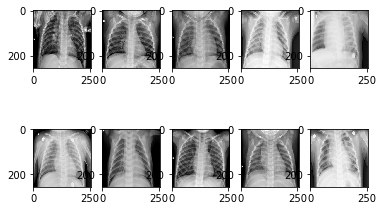

In [6]:
# display some images
for i, img in enumerate(X_train[:10,:,:]):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
print(y_train[:10])

# Model